<a href="https://colab.research.google.com/github/biswasRanjith/Attendence_management_system/blob/master/Group117_CN7031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Data Analytics [CN7031] CRWK 2024-25**
---
# **Group ID: [117]**
1.   Student 1: Ranjith Biswas and 2729781
2.   Student 2: Krupa Shivanna and 2782017
3.   Student 3: Ragini and ID
4.   Student 4: Pavani and ID

# **Introduction**

lets write some intriduction of the data set and about the course work here.


---
# **Initiate and Configure Spark**

write some lines on pre-requisites and librabries required and their functionalities.

In [33]:
#check python version

!python --version

Python 3.10.12


In [34]:
#Install Required Libraries

!pip install pyspark matplotlib seaborn


In [35]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_extract, col, split, round as sql_round
from pyspark.sql.types import StructType, StructField, StringType
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [36]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("LogProcessingAndVisualization") \
    .getOrCreate()

---
# **Load Unstructured Data**

write a line on loading the data set file into google collab. Load log data into an RDD

In [37]:
# Define log file path (update with your actual file path)
log_data_file = "/content/web.log"

#  Load log data into an RDD
rdd_log_data = spark.sparkContext.textFile(log_data_file)

---
# **Task 1: Data Processing using PySpark DF**

write few lines about the regex ,
DF Creation with REGEX,
Two advanced DF Analysis,
Utilize data visualization, basically how the data processing is done and regex pattern used

write opnion on teams pov.


**DF Creation with REGEX**

Ranjith Biswas - 2729781

In [9]:
# Function to define schemas and extract data.
def extract_data_with_schema(log_pattern, schema_fields):
    def parse_line(line):
        match = re.match(log_pattern, line)
        return match.groups() if match else None

    parsed_rdd = rdd_log_data.map(parse_line).filter(lambda x: x is not None)
    schema = StructType([StructField(field, StringType(), True) for field in schema_fields])
    return spark.createDataFrame(parsed_rdd, schema=schema)

# Extracting IP, Timestamp, request, status, response_size, message and method
student_1_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(.*?)\] \"(.*?)\" (\d{3}) (\d+|-) (.*)'
student_1_fields = ["ip", "timestamp", "request", "status", "response_size", "message"]
student_1_df = extract_data_with_schema(student_1_pattern, student_1_fields)
student_1_df = student_1_df.withColumn("method", regexp_extract("request", r'^(GET|POST|PUT|DELETE)', 1))
student_1_df.createOrReplaceTempView("student_1_logs")
print("Schema for Student 1:")
student_1_df.printSchema()
print("Top 10 rows for Student 1:")
student_1_df.show(10, truncate=False)



# # Step 6: Define REGEX and detect schema dynamically
# def detect_schema(data_lines):

#     log_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(.*?)\] \"(.*?)\" (\d{3}) (\d+|-) (.*)'
#     schema_fields = ["ip", "timestamp", "request", "status", "response_size", "message"]
#     for line in data_lines:
#         match = re.match(log_pattern, line)
#         if match:
#             detected_schema = match.groups()
#             print("Detected Schema: ", schema_fields)
#             return schema_fields
#     return []

# # Detect schema using the first few lines of the log file
# data_lines = rdd_log_data.take(15)
# schema_fields = detect_schema(data_lines)

# # Step 7: Parse log data using REGEX
# def parse_log(line):
#     log_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(.*?)\] \"(.*?)\" (\d{3}) (\d+|-) (.*)'
#     match = re.match(log_pattern, line)
#     if match:
#         return match.groups()
#     else:
#         return None

# # Apply parsing function to the RDD and filter out invalid lines
# parsed_rdd = rdd_log_data.map(parse_log).filter(lambda x: x is not None)

# # Step 8: Define the schema for the DataFrame dynamically
# schema = StructType([StructField(field, StringType(), True) for field in schema_fields])

# # Create DataFrame from parsed RDD
# log_df = spark.createDataFrame(parsed_rdd, schema=schema)

# # Step 9: Extract additional fields (HTTP method and URL)
# log_df = log_df.withColumn("method", regexp_extract("request", r'^(GET|POST|PUT|DELETE)', 1)) \
#                .withColumn("url", regexp_extract("request", r'^(GET|POST|PUT|DELETE) (.*?) HTTP', 2))

# # Step 10: Display the schema and DataFrame
# log_df.printSchema()
# log_df.show(truncate=False)


Schema for Student 1:
root
 |-- ip: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- request: string (nullable = true)
 |-- status: string (nullable = true)
 |-- response_size: string (nullable = true)
 |-- message: string (nullable = true)
 |-- method: string (nullable = true)

Top 10 rows for Student 1:
+--------------+--------------------+-----------------------------------------+------+-------------+--------------------------------------------------------------+------+
|ip            |timestamp           |request                                  |status|response_size|message                                                       |method|
+--------------+--------------------+-----------------------------------------+------+-------------+--------------------------------------------------------------+------+
|88.211.105.115|04/Mar/2022:14:17:48|POST /history/missions/ HTTP/2.0         |414   |12456        |Caution: System may require attention. Check logs for deta

**Advanced DF Analysis**



+------+-------+
|method|  count|
+------+-------+
|   GET|1001043|
|  POST|1000505|
|   PUT| 998452|
+------+-------+



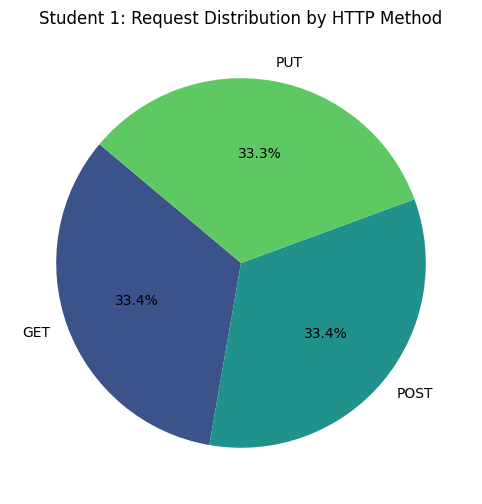

In [10]:
# Query 1: HTTP Method distribution
query_1_result = spark.sql("""
SELECT method, COUNT(*) AS count
FROM student_1_logs
GROUP BY method
ORDER BY count DESC
""")

query_1_result.show()

query_1_pd = query_1_result.toPandas()
plt.figure(figsize=(8, 6))
plt.pie(query_1_pd['count'], labels=query_1_pd['method'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(query_1_pd)))
plt.title("Student 1: Request Distribution by HTTP Method")
plt.show()

This query can help:

Identify periods of unusually high or low activity in terms of unique visitors.
Detect potential anomalies like Distributed Denial of Service (DDoS) attacks if the unique IP count suddenly spikes.
Provide insights into user engagement patterns over the day, which could guide marketing or operational strategies.

+----+-------------+
|hour|request_count|
+----+-------------+
|  00|       125373|
|  01|       124866|
|  02|       125019|
|  03|       124947|
|  04|       125239|
|  05|       125049|
|  06|       125200|
|  07|       124930|
|  08|       124976|
|  09|       125056|
|  10|       124963|
|  11|       124603|
|  12|       124817|
|  13|       124634|
|  14|       125461|
|  15|       125812|
|  16|       125191|
|  17|       124644|
|  18|       124872|
|  19|       124683|
+----+-------------+
only showing top 20 rows



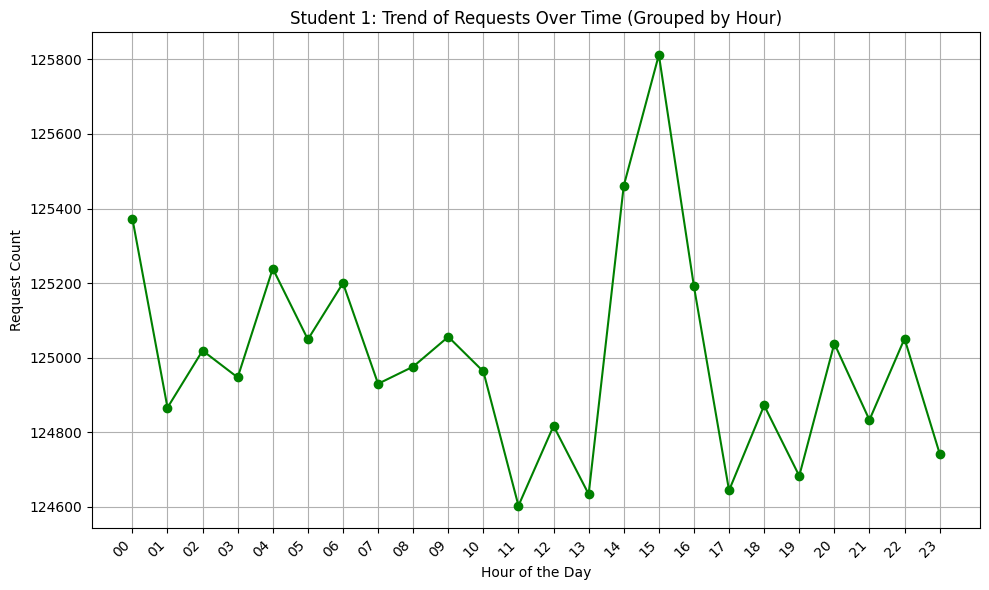

In [11]:
query_1_requests_by_hour = spark.sql("""
SELECT
    substring(timestamp, 13, 2) AS hour,
    COUNT(*) AS request_count
FROM student_1_logs
GROUP BY hour
ORDER BY hour
""")

query_1_requests_by_hour.show()

# Convert query result to Pandas DataFrame for visualization
query_1_requests_by_hour_pd = query_1_requests_by_hour.toPandas()

# Line Graph Visualization
plt.figure(figsize=(10, 6))
plt.plot(query_1_requests_by_hour_pd['hour'], query_1_requests_by_hour_pd['request_count'], marker='o', linestyle='-', color='green')
plt.title("Student 1: Trend of Requests Over Time (Grouped by Hour)")
plt.xlabel("Hour of the Day")
plt.ylabel("Request Count")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

Krupa Shivanna - 2782017

In [12]:
# Extracting Timestamp, Status, and Response Size

student_2_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(.*?)\] \".* (.*?) HTTP.*"'
student_2_fields = ["ip", "timestamp", "url"]
student_2_df = extract_data_with_schema(student_2_pattern, student_2_fields)
student_2_df.createOrReplaceTempView("student_2_logs")
print("Schema for Student 2:")
student_2_df.printSchema()
print("Top 10 rows for Student 2:")
student_2_df.show(10, truncate=False)

Schema for Student 2:
root
 |-- ip: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- url: string (nullable = true)

Top 10 rows for Student 2:
+--------------+--------------------+----------------------------+
|ip            |timestamp           |url                         |
+--------------+--------------------+----------------------------+
|88.211.105.115|04/Mar/2022:14:17:48|/history/missions/          |
|144.6.49.142  |02/Sep/2022:15:16:00|/security/firewall/         |
|231.70.64.145 |19/Jul/2022:01:31:31|/web-development/countdown/ |
|219.42.234.172|08/Feb/2022:11:34:57|/networking/technology/     |
|183.173.185.94|29/Aug/2023:03:07:11|/security/firewall/         |
|164.12.8.113  |22/May/2023:09:48:25|/web-development/technology/|
|110.98.7.240  |22/Jan/2023:09:55:54|/history/apollo/            |
|27.182.196.243|28/Mar/2022:05:37:59|/history/apollo-11/         |
|123.31.25.147 |25/Feb/2023:12:03:32|/data-analysis/missions/    |
|220.182.78.75 |22/Dec/2022:12:

**Advanced DF Analysis**

+--------------------+-------------+
|                 url|request_count|
+--------------------+-------------+
| /history/apollo-11/|        24565|
|/web-development/...|        24648|
|/data-analysis/aw...|        24686|
|/machine-learning...|        24690|
|/web-development/...|        24719|
|   /images/firewall/|        24733|
|/cloud-computing/...|        24735|
|/machine-learning...|        24737|
|/web-development/...|        24742|
|   /software/apollo/|        24746|
+--------------------+-------------+



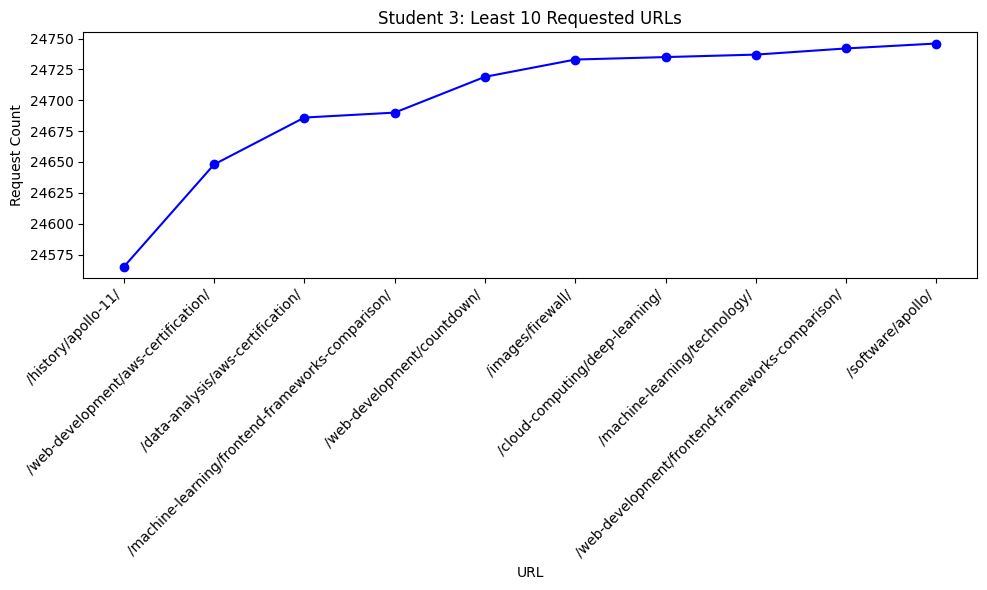

In [13]:
query_3_result = spark.sql("""
SELECT url, COUNT(*) AS request_count
FROM student_2_logs
GROUP BY url
ORDER BY request_count ASC
LIMIT 10
""")

query_3_result.show()

query_3_pd = query_3_result.toPandas()
plt.figure(figsize=(10, 6))
plt.plot(query_3_pd['url'], query_3_pd['request_count'], marker='o', linestyle='-', color='b')
plt.title("Student 3: Least 10 Requested URLs")
plt.xlabel("URL")
plt.ylabel("Request Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

+---------------+----------------+
|             ip|unique_url_count|
+---------------+----------------+
|  34.162.74.219|               2|
|  99.206.20.253|               2|
|   90.93.168.28|               2|
|  50.100.60.144|               2|
| 211.140.93.157|               2|
| 254.120.96.104|               2|
|    95.73.97.42|               2|
|  198.28.170.70|               2|
|   77.32.147.84|               2|
|153.191.251.249|               2|
+---------------+----------------+



<ipython-input-14-3517802933b3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


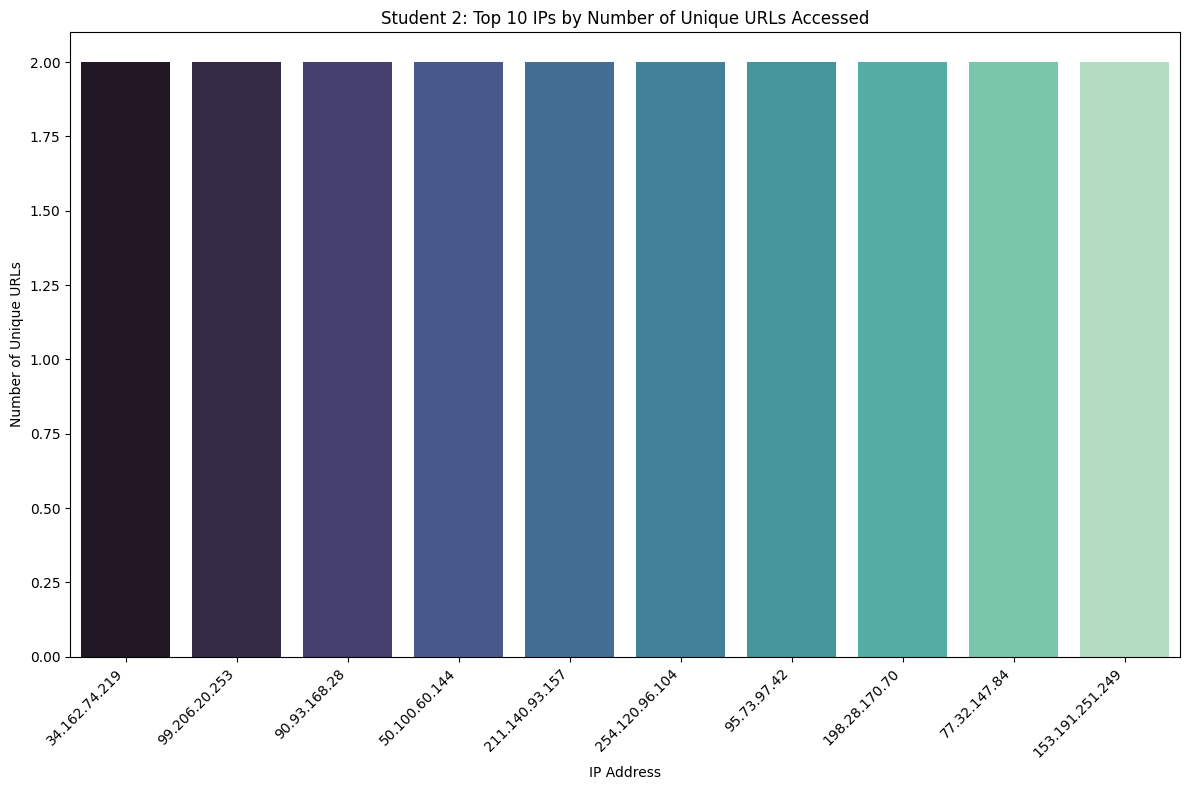

In [14]:
query_unique_urls_per_ip = spark.sql("""
SELECT
    ip,
    COUNT(DISTINCT url) AS unique_url_count
FROM student_2_logs
WHERE url IS NOT NULL
GROUP BY ip
ORDER BY unique_url_count DESC
LIMIT 10
""")
query_unique_urls_per_ip.show()
# Convert query result to Pandas DataFrame for visualization
query_unique_urls_per_ip_pd = query_unique_urls_per_ip.toPandas()

# Bar Chart Visualization
plt.figure(figsize=(12, 8))
sns.barplot(
    data=query_unique_urls_per_ip_pd,
    x="ip",
    y="unique_url_count",
    palette="mako"
)
plt.title("Student 2: Top 10 IPs by Number of Unique URLs Accessed")
plt.xlabel("IP Address")
plt.ylabel("Number of Unique URLs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Ragini - 2782017

In [15]:
# Extracting ip, Status, and message
student_3_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - .* \".*\" (\d{3}) (.*)'
student_3_fields = ["ip", "status", "message"]
student_3_df = extract_data_with_schema(student_3_pattern, student_3_fields)
student_3_df.createOrReplaceTempView("student_3_logs")
print("Schema for Student 3:")
student_3_df.printSchema()
print("Top 10 rows for Student 3:")
student_3_df.show(10, truncate=False)

Schema for Student 3:
root
 |-- ip: string (nullable = true)
 |-- status: string (nullable = true)
 |-- message: string (nullable = true)

Top 10 rows for Student 3:
+--------------+------+--------------------------------------------------------------------+
|ip            |status|message                                                             |
+--------------+------+--------------------------------------------------------------------+
|88.211.105.115|414   |12456 Caution: System may require attention. Check logs for details.|
|144.6.49.142  |203   |97126 Warning: Unusual behavior detected. Investigate further.      |
|231.70.64.145 |201   |33093 Informational message. No action required.                    |
|219.42.234.172|415   |68827 Debug: Detailed system state information.                     |
|183.173.185.94|205   |30374 Warning: Unusual behavior detected. Investigate further.      |
|164.12.8.113  |200   |14633 Informational message. No action required.                   

Pavani - 2782017

In [16]:
student_4_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - .* \"(GET|POST|PUT|DELETE).*\" (\d{3})'
student_4_fields = ["ip", "method", "status"]
student_4_df = extract_data_with_schema(student_4_pattern, student_4_fields)
student_4_df.createOrReplaceTempView("student_4_logs")
print("Schema for Student 4:")
student_4_df.printSchema()
print("Top 10 rows for Student 4:")
student_4_df.show(10, truncate=False)

Schema for Student 4:
root
 |-- ip: string (nullable = true)
 |-- method: string (nullable = true)
 |-- status: string (nullable = true)

Top 10 rows for Student 4:
+--------------+------+------+
|ip            |method|status|
+--------------+------+------+
|88.211.105.115|POST  |414   |
|144.6.49.142  |POST  |203   |
|231.70.64.145 |PUT   |201   |
|219.42.234.172|POST  |415   |
|183.173.185.94|GET   |205   |
|164.12.8.113  |GET   |200   |
|110.98.7.240  |PUT   |204   |
|27.182.196.243|GET   |414   |
|123.31.25.147 |GET   |204   |
|220.182.78.75 |GET   |200   |
+--------------+------+------+
only showing top 10 rows




**Advanced DF Analysis**



+------+------+-----+
|method|status|count|
+------+------+-----+
|   GET|   200|71918|
|   GET|   202|71805|
|   GET|   201|71783|
|   GET|   404|71758|
|   GET|   308|71736|
|   GET|   205|71659|
|   GET|   500|71475|
|   GET|   414|71468|
|   GET|   416|71441|
|   GET|   415|71412|
|   GET|   307|71364|
|   GET|   304|71293|
|   GET|   203|71030|
|   GET|   204|70901|
|  POST|   414|72077|
|  POST|   203|71956|
|  POST|   500|71666|
|  POST|   404|71646|
|  POST|   202|71542|
|  POST|   205|71432|
+------+------+-----+
only showing top 20 rows



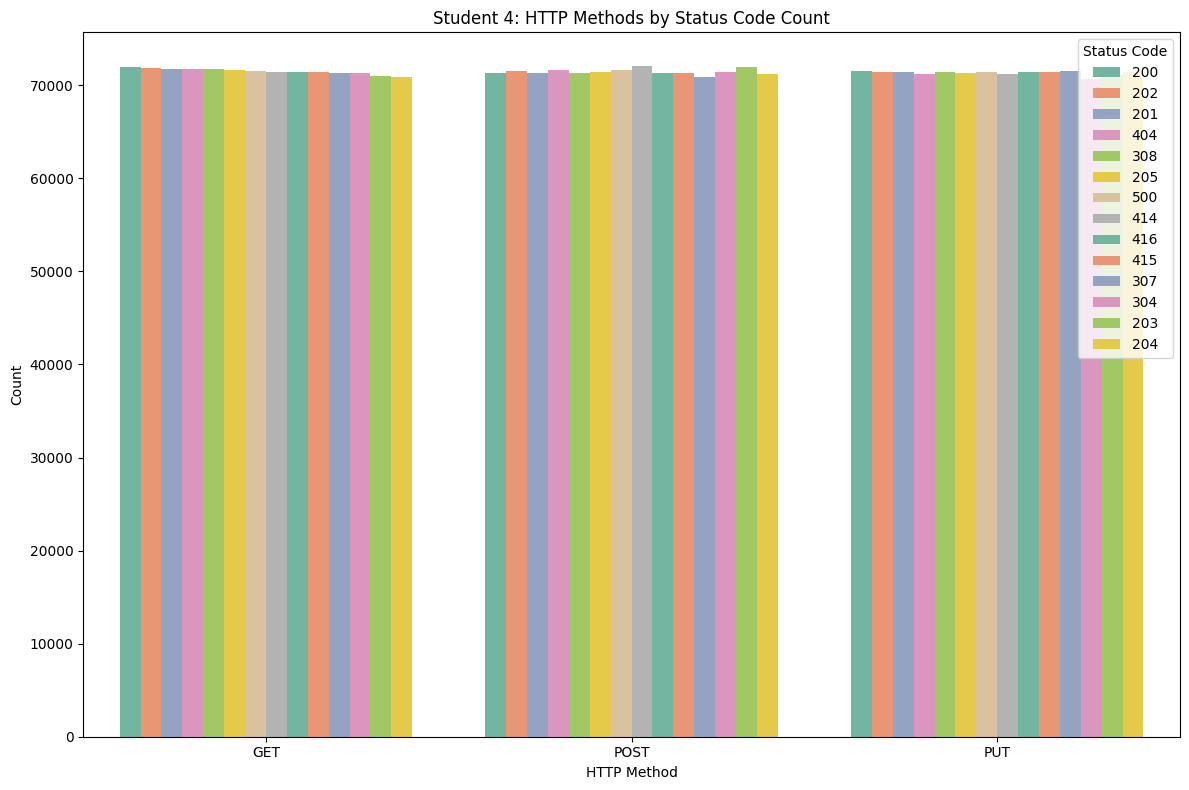

In [17]:
query_methods_status = spark.sql("""
SELECT
    method,
    status,
    COUNT(*) AS count
FROM student_4_logs
GROUP BY method, status
ORDER BY method, count DESC
""")
query_methods_status.show()
# Convert to Pandas DataFrame for visualization
query_methods_status_pd = query_methods_status.toPandas()

# Visualization using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=query_methods_status_pd,
    x="method",
    y="count",
    hue="status",
    palette="Set2"
)
plt.title("Student 4: HTTP Methods by Status Code Count")
plt.xlabel("HTTP Method")
plt.ylabel("Count")
plt.legend(title="Status Code")
plt.tight_layout()
plt.show()


In [28]:
# Least requested URLs
query_2_result = spark.sql("""
SELECT url, COUNT(*) AS request_count
FROM student_2_logs
GROUP BY url
ORDER BY request_count ASC
LIMIT 10
""")

query_2_result.show()
spark.stop()

+--------------------+-------------+
|                 url|request_count|
+--------------------+-------------+
| /history/apollo-11/|        24565|
|/web-development/...|        24648|
|/data-analysis/aw...|        24686|
|/machine-learning...|        24690|
|/web-development/...|        24719|
|   /images/firewall/|        24733|
|/cloud-computing/...|        24735|
|/machine-learning...|        24737|
|/web-development/...|        24742|
|   /software/apollo/|        24746|
+--------------------+-------------+



In [ ]:
import re
from pyspark.sql import SparkSession

# Step 1: Initialize Spark Session
spark = SparkSession.builder \
    .appName("RDD Log Analysis with Error Handling") \
    .getOrCreate()

# Step 2: Load the log file into an RDD
log_file_path = "/content/web.log"  # Update with your actual log file path
log_rdd = spark.sparkContext.textFile(log_file_path)

# Step 3: Define a function to parse log entries
def parse_log_entry(line):
    # Check if the line is a string and not None
    if not isinstance(line, str):
        return None
    # Regex pattern to extract log details
    log_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(.*?)\] "(.*?)" (\d{3}) (\d+|-)'
    match = re.match(log_pattern, line)
    if match:
        ip, timestamp, request, status, size = match.groups()
        return (ip, timestamp, request, int(status), int(size) if size.isdigit() else 0)
    else:
        return None

# Step 4: Parse log entries and filter out malformed lines
parsed_rdd = log_rdd.map(parse_log_entry).filter(lambda x: x is not None)

# Step 5: Perform basic RDD analysis
# Count HTTP methods
http_method_counts = (
    parsed_rdd.map(lambda x: (x[2].split()[0], 1))
    .reduceByKey(lambda a, b: a + b)
    .collect()
)
print("HTTP Method Counts:", http_method_counts)

# Step 6: Perform advanced RDD analysis
# 1. Calculate hourly visit counts per IP
hourly_visits = (
    parsed_rdd.map(lambda x: ((x[0], x[1].split(":")[1]), 1))
    .reduceByKey(lambda a, b: a + b)
    .collect()
)
print("Hourly Visits per IP:", hourly_visits)

# 2. Find top 10 visited URLs
top_10_urls = (
    parsed_rdd.map(lambda x: (x[2].split()[1], 1))
    .reduceByKey(lambda a, b: a + b)
    .sortBy(lambda x: x[1], ascending=False)
    .take(10)
)
print("Top 10 Visited URLs:", top_10_urls)

# Step 7: Handle errors or malformed entries for debugging
malformed_entries = log_rdd.filter(lambda line: parse_log_entry(line) is None).collect()
print("Malformed Entries (for debugging):", malformed_entries)

# Step 8: Stop the Spark Session
# spark.stop()


HTTP Method Counts: [('POST', 1000505), ('PUT', 998452), ('GET', 1001043)]
Buffered data was truncated after reaching the output size limit.

# Data Processing using PySpark RDD

Ranjith Biswas 2729781

In [108]:
from pyspark import SparkConf, SparkContext
import re

# Stop any existing SparkContext
if 'sc' in globals():
    sc.stop()


# Initialize SparkContext

conf = SparkConf().setAppName("BasicRDDAnalysis").setMaster("local")
sc = SparkContext(conf=conf)


In [109]:
# Load the log file
rdd_log_data = sc.textFile("/content/web.log")



Parse log entries using custom function.

In [110]:
# Define a function to parse log entries
def parse_log_entry(log_line):
    log_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(.*?)\] "(.*?)" (\d{3}) (\d+|-)'
    match = re.match(log_pattern, log_line)
    if match:
        return {
            "ip": match.group(1),
            "timestamp": match.group(2),
            "request": match.group(3),
            "status": int(match.group(4)),
            "response_size": match.group(5) if match.group(5) != "-" else 0,
        }
    return None

# Parse the logs using map
parsed_logs_rdd = rdd_log_data.map(parse_log_entry).filter(lambda x: x is not None)
print(f"Total valid log entries: {parsed_logs_rdd.count()}")


# Display the first 10 entries
print("Parsed logs entries:")
for entry in parsed_logs_rdd.take(10):
    print(entry)


Total valid log entries: 3000000
Parsed logs entries:
{'ip': '88.211.105.115', 'timestamp': '04/Mar/2022:14:17:48', 'request': 'POST /history/missions/ HTTP/2.0', 'status': 414, 'response_size': '12456'}
{'ip': '144.6.49.142', 'timestamp': '02/Sep/2022:15:16:00', 'request': 'POST /security/firewall/ HTTPS/1.0', 'status': 203, 'response_size': '97126'}
{'ip': '231.70.64.145', 'timestamp': '19/Jul/2022:01:31:31', 'request': 'PUT /web-development/countdown/ HTTP/1.0', 'status': 201, 'response_size': '33093'}
{'ip': '219.42.234.172', 'timestamp': '08/Feb/2022:11:34:57', 'request': 'POST /networking/technology/ HTTP/1.0', 'status': 415, 'response_size': '68827'}
{'ip': '183.173.185.94', 'timestamp': '29/Aug/2023:03:07:11', 'request': 'GET /security/firewall/ HTTP/2.0', 'status': 205, 'response_size': '30374'}
{'ip': '164.12.8.113', 'timestamp': '22/May/2023:09:48:25', 'request': 'GET /web-development/technology/ HTTP/1.0', 'status': 200, 'response_size': '14633'}
{'ip': '110.98.7.240', 'tim

b. Extract those entries that you would like to provide basic processing

In [111]:
# Extract specific fields from the parsed RDD
extracted_rdd = parsed_logs_rdd.map(lambda x: (x["ip"], x["timestamp"], x["request"].split(" ")[0], x["status"]))
print("Parsed extracted logs entries:")
# Display the first 10 entries
for entry in extracted_rdd.take(10):
    print(entry)

Parsed extracted logs entries:
('88.211.105.115', '04/Mar/2022:14:17:48', 'POST', 414)
('144.6.49.142', '02/Sep/2022:15:16:00', 'POST', 203)
('231.70.64.145', '19/Jul/2022:01:31:31', 'PUT', 201)
('219.42.234.172', '08/Feb/2022:11:34:57', 'POST', 415)
('183.173.185.94', '29/Aug/2023:03:07:11', 'GET', 205)
('164.12.8.113', '22/May/2023:09:48:25', 'GET', 200)
('110.98.7.240', '22/Jan/2023:09:55:54', 'PUT', 204)
('27.182.196.243', '28/Mar/2022:05:37:59', 'GET', 414)
('123.31.25.147', '25/Feb/2023:12:03:32', 'GET', 204)
('220.182.78.75', '22/Dec/2022:12:55:00', 'GET', 200)


c. RDD transformation+action operator.

In [47]:
# Basic Processing: Extract entries with status code 200
status_200_rdd = parsed_logs_rdd.filter(lambda log: log["status"] == 200)
print("Filtered logs with status 200. Total count:", status_200_rdd.count())

# Display a few sample entries for status code 200
print("Sample entries with status 200:")
for entry in status_200_rdd.take(5):
    print(entry)

# Transformation with flatMap: Extract all request URLs
def extract_urls(log):
    if "request" in log and log["request"]:
        # Extract URL from the request field
        match = re.match(r'^\w+ (.+?) HTTP', log["request"])
        if match:
            return [match.group(1)]
    return []

# Apply flatMap to extract URLs
urls_rdd = parsed_logs_rdd.flatMap(extract_urls)
unique_urls = urls_rdd.distinct().collect()
print("Total unique URLs:", len(unique_urls))
print("Sample unique URLs:")
for url in unique_urls[:5]:
    print(url)

# Example Action: Reduce to find the total response size for status code 200
total_response_size = status_200_rdd.map(lambda log: int(log["response_size"])).reduce(lambda a, b: a + b)
print("Total response size for status 200:", total_response_size)



Filtered logs with status 200. Total count: 214791
Sample entries with status 200:
{'ip': '164.12.8.113', 'timestamp': '22/May/2023:09:48:25', 'request': 'GET /web-development/technology/ HTTP/1.0', 'status': 200, 'response_size': '14633'}
{'ip': '220.182.78.75', 'timestamp': '22/Dec/2022:12:55:00', 'request': 'GET /history/launch/ HTTP/2.0', 'status': 200, 'response_size': '84446'}
{'ip': '118.58.75.221', 'timestamp': '04/Sep/2022:12:46:07', 'request': 'POST /data-analysis/apollo-11/ HTTPS/1.0', 'status': 200, 'response_size': '6676'}
{'ip': '240.61.130.184', 'timestamp': '09/Feb/2022:08:27:03', 'request': 'PUT /security/firewall/ HTTPS/1.0', 'status': 200, 'response_size': '41452'}
{'ip': '202.226.32.118', 'timestamp': '18/Jun/2023:10:16:56', 'request': 'GET /cloud-computing/launch/ HTTPS/1.0', 'status': 200, 'response_size': '29113'}
Total unique URLs: 120
Sample unique URLs:
/security/firewall/
/history/apollo-11/
/shuttle/data/
/web-development/firewall/
/machine-learning/apollo-1

# Two Advanced RDD Analysis

Ranjith Biswas 2729781

In [116]:
def parse_log_entry(line):
    try:
        pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(.*?)\] "(GET|POST|PUT|DELETE) (.*?) HTTP/.*" (\d{3}) (\d+|-)'
        match = re.match(pattern, line)
        if match:
            ip, timestamp, method, url, status, response_size = match.groups()
            return {
                "ip": ip,
                "timestamp": timestamp,
                "method": method,
                "url": url,
                "status": int(status),
                "response_size": int(response_size) if response_size.isdigit() else 0,
            }
        else:
            return None
    except Exception as e:
        print(f"Error parsing line: {line} | Error: {e}")
        return None

# Parse the log entries and filter out malformed ones
parsed_rdd = rdd_log_data.map(parse_log_entry).filter(lambda x: x is not None)

# Display the first 10 entries
print("Parsed logs entries:")
for entry in parsed_rdd.take(10):
    print(entry)


Parsed logs entries:
{'ip': '88.211.105.115', 'timestamp': '04/Mar/2022:14:17:48', 'method': 'POST', 'url': '/history/missions/', 'status': 414, 'response_size': 12456}
{'ip': '231.70.64.145', 'timestamp': '19/Jul/2022:01:31:31', 'method': 'PUT', 'url': '/web-development/countdown/', 'status': 201, 'response_size': 33093}
{'ip': '219.42.234.172', 'timestamp': '08/Feb/2022:11:34:57', 'method': 'POST', 'url': '/networking/technology/', 'status': 415, 'response_size': 68827}
{'ip': '183.173.185.94', 'timestamp': '29/Aug/2023:03:07:11', 'method': 'GET', 'url': '/security/firewall/', 'status': 205, 'response_size': 30374}
{'ip': '164.12.8.113', 'timestamp': '22/May/2023:09:48:25', 'method': 'GET', 'url': '/web-development/technology/', 'status': 200, 'response_size': 14633}
{'ip': '110.98.7.240', 'timestamp': '22/Jan/2023:09:55:54', 'method': 'PUT', 'url': '/history/apollo/', 'status': 204, 'response_size': 63819}
{'ip': '123.31.25.147', 'timestamp': '25/Feb/2023:12:03:32', 'method': 'GET',

In [117]:
# Transformation 1: Calculate hourly visit counts per IP and find top 10 visited URLs
def process_hourly_visits_and_urls(rdd):
    try:
        # Step 1: Group visits by hour using groupByKey
        grouped_by_hour = (
            rdd.map(lambda entry: (entry["timestamp"].split(':')[1], 1))  # Extract hour as key
            .groupByKey()  # Group by hour
        )

        # Step 2: Calculate the total visits for each hour
        hourly_visits = (
            grouped_by_hour.mapValues(lambda counts: sum(counts))  # Sum up visits per hour
            .sortByKey()  # Sort by hour
        )

        # Collect hourly visit counts for all 24 hours
        hourly_visits_result = hourly_visits.collect()

        # Display hourly visits for 24 hours
        print("\nHourly Visit Counts for 24 Hours:")
        for hour, count in hourly_visits_result:
            print(f"Hour {hour}: {count} visits")

    except Exception as e:
        print(f"Error during processing hourly visits with groupByKey: {e}")

process_hourly_visits_and_urls(parsed_rdd)




Hourly Visit Counts for 24 Hours:
Hour 00: 83391 visits
Hour 01: 83204 visits
Hour 02: 83691 visits
Hour 03: 83708 visits
Hour 04: 83646 visits
Hour 05: 83258 visits
Hour 06: 83712 visits
Hour 07: 83419 visits
Hour 08: 83551 visits
Hour 09: 83534 visits
Hour 10: 83126 visits
Hour 11: 82875 visits
Hour 12: 83182 visits
Hour 13: 83313 visits
Hour 14: 83470 visits
Hour 15: 83677 visits
Hour 16: 83357 visits
Hour 17: 83168 visits
Hour 18: 83230 visits
Hour 19: 83187 visits
Hour 20: 83445 visits
Hour 21: 83120 visits
Hour 22: 83152 visits
Hour 23: 83236 visits


In [74]:
# Transformation 3: Distribution of requests per status code and response size stats
def process_status_code_distribution_and_response_size(rdd):
    try:
        # Group by status codes and count the number of requests for each code
        status_code_distribution = (
            rdd.map(lambda entry: (entry["status"], 1))
            .reduceByKey(lambda x, y: x + y)
            .sortByKey()
        )

        # Aggregate total response size and count per URL
        response_size_stats = (
            rdd.map(lambda entry: (entry["url"], (entry["response_size"], 1)))  # (URL, (response_size, 1))
            .aggregateByKey((0, 0),  # Initial value: (sum of response_size, count)
                            lambda acc, value: (acc[0] + value[0], acc[1] + value[1]),  # Local combine
                            lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1]))  # Global combine
            .mapValues(lambda x: (x[0], x[0] / x[1] if x[1] != 0 else 0))  # (total, average)
        )

        # Collect and display results
        print("\nStatus Code Distribution:")
        for status, count in status_code_distribution.collect():
            print(f"Status {status}: {count} requests")

        print("\nResponse Size Stats Per URL (Total, Average):")
        for url, stats in response_size_stats.take(10):
            print(f"URL: {url}, Total Size: {stats[0]}, Average Size: {stats[1]}")

    except Exception as e:
        print(f"Error during processing status code distribution and response size stats: {e}")

process_status_code_distribution_and_response_size(parsed_rdd)


Status Code Distribution:
Status 200: 143281 requests
Status 201: 143297 requests
Status 202: 143188 requests
Status 203: 142909 requests
Status 204: 142443 requests
Status 205: 143010 requests
Status 304: 142592 requests
Status 307: 142467 requests
Status 308: 142990 requests
Status 404: 143344 requests
Status 414: 142972 requests
Status 415: 142861 requests
Status 416: 142711 requests
Status 500: 142587 requests

Response Size Stats Per URL (Total, Average):
URL: /security/firewall/, Total Size: 846773056, Average Size: 50774.90292018948
URL: /web-development/firewall/, Total Size: 835473728, Average Size: 50454.358838094086
URL: /history/apollo-11/, Total Size: 830469280, Average Size: 50653.81396767307
URL: /machine-learning/technology/, Total Size: 827970256, Average Size: 50271.41809350334
URL: /web-development/deep-learning/, Total Size: 849522171, Average Size: 50627.06620977354
URL: /machine-learning/apollo-11/, Total Size: 843659587, Average Size: 50706.7909003486
URL: /secu

Krupa

Basic RDD Analysis

In [118]:
# Regex pattern to extract required fields: IP, Timestamp, Method, URL, Status, Size
log_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(.*?)\] "(GET|POST|PUT|DELETE) (.*?) HTTP/.*" (\d{3}) (\d+|-)'

# Function to parse log entries
def parse_log_entry(line):
    match = re.match(log_pattern, line)
    if match:
        ip, timestamp, method, url, status, response_size = match.groups()
        return {
            "ip": ip,
            "timestamp": timestamp,
            "method": method,
            "url": url,
            "status": int(status),
            "response_size": int(response_size) if response_size.isdigit() else 0,
        }
    else:
        return None  # Handle malformed entries

# Parse log lines and filter out invalid lines
parsed_logs = rdd_log_data.map(parse_log_entry).filter(lambda x: x is not None)

# Display the first 10 entries
print("Parsed logs entries:")
for entry in parsed_logs.take(10):
    print(entry)



Parsed logs entries:
{'ip': '88.211.105.115', 'timestamp': '04/Mar/2022:14:17:48', 'method': 'POST', 'url': '/history/missions/', 'status': 414, 'response_size': 12456}
{'ip': '231.70.64.145', 'timestamp': '19/Jul/2022:01:31:31', 'method': 'PUT', 'url': '/web-development/countdown/', 'status': 201, 'response_size': 33093}
{'ip': '219.42.234.172', 'timestamp': '08/Feb/2022:11:34:57', 'method': 'POST', 'url': '/networking/technology/', 'status': 415, 'response_size': 68827}
{'ip': '183.173.185.94', 'timestamp': '29/Aug/2023:03:07:11', 'method': 'GET', 'url': '/security/firewall/', 'status': 205, 'response_size': 30374}
{'ip': '164.12.8.113', 'timestamp': '22/May/2023:09:48:25', 'method': 'GET', 'url': '/web-development/technology/', 'status': 200, 'response_size': 14633}
{'ip': '110.98.7.240', 'timestamp': '22/Jan/2023:09:55:54', 'method': 'PUT', 'url': '/history/apollo/', 'status': 204, 'response_size': 63819}
{'ip': '123.31.25.147', 'timestamp': '25/Feb/2023:12:03:32', 'method': 'GET',

In [86]:
# Step 2: Use flatMap to emit multiple data points for URLs and status codes
flat_mapped_rdd = parsed_logs.flatMap(lambda entry: [
    (entry["status"], 1),  # Status code for counting
    (entry["url"], 1)      # URL for visit count
])

# Step 3: Reduce by key to aggregate counts
aggregated_rdd = flat_mapped_rdd.reduceByKey(lambda x, y: x + y)

# Step 4: Use map to transform the aggregated RDD for display purposes
mapped_rdd = aggregated_rdd.map(lambda x: (x[0], x[1]))

# Step 5: Separate status code counts and URL counts
status_counts = mapped_rdd.filter(lambda x: isinstance(x[0], int))
url_counts = mapped_rdd.filter(lambda x: isinstance(x[0], str))

# Step 6: Get top 10 status codes
top_status_codes = status_counts.sortBy(lambda x: x[1], ascending=False).take(10)

# Step 7: Get top 10 URLs
top_urls = url_counts.sortBy(lambda x: x[1], ascending=False).take(10)

# Display the top 10 status codes
print("\nTop 10 Status Codes:")
for status, count in top_status_codes:
    print(f"Status Code: {status}, Count: {count}")

# Display the top 10 URLs
print("\nTop 10 Visited URLs:")
for url, count in top_urls:
    print(f"URL: {url}, Count: {count}")



Top 10 Status Codes:
Status Code: 404, Count: 143344
Status Code: 201, Count: 143297
Status Code: 200, Count: 143281
Status Code: 202, Count: 143188
Status Code: 205, Count: 143010
Status Code: 308, Count: 142990
Status Code: 414, Count: 142972
Status Code: 203, Count: 142909
Status Code: 415, Count: 142861
Status Code: 416, Count: 142711

Top 10 Visited URLs:
URL: /software/data/, Count: 16955
URL: /web-development/missions/, Count: 16946
URL: /software/technology/, Count: 16928
URL: /security/technology/, Count: 16921
URL: /data-analysis/technology/, Count: 16919
URL: /data-analysis/apollo/, Count: 16912
URL: /security/aws-certification/, Count: 16900
URL: /machine-learning/countdown/, Count: 16895
URL: /images/apollo/, Count: 16889
URL: /networking/deep-learning/, Count: 16889


Two Advanced RDD Analysis

In [92]:
# Function to parse log entries
def parse_log_entry(line):
    match = re.match(log_pattern, line)
    if match:
        ip, timestamp, method, url, status, response_size = match.groups()
        return {
            "ip": ip,
            "timestamp": timestamp,
            "method": method,
            "url": url,
            "status": int(status),
            "response_size": int(response_size) if response_size.isdigit() else 0,
        }
    else:
        return None

parsed_rdd = rdd_log_data.map(parse_log_entry).filter(lambda x: x is not None)

# Display a few parsed entries
print("\nParsed Log Entries (First 5):")
for record in parsed_rdd.take(5):
    print(record)



Parsed Log Entries (First 5):
{'ip': '88.211.105.115', 'timestamp': '04/Mar/2022:14:17:48', 'method': 'POST', 'url': '/history/missions/', 'status': 414, 'response_size': 12456}
{'ip': '231.70.64.145', 'timestamp': '19/Jul/2022:01:31:31', 'method': 'PUT', 'url': '/web-development/countdown/', 'status': 201, 'response_size': 33093}
{'ip': '219.42.234.172', 'timestamp': '08/Feb/2022:11:34:57', 'method': 'POST', 'url': '/networking/technology/', 'status': 415, 'response_size': 68827}
{'ip': '183.173.185.94', 'timestamp': '29/Aug/2023:03:07:11', 'method': 'GET', 'url': '/security/firewall/', 'status': 205, 'response_size': 30374}
{'ip': '164.12.8.113', 'timestamp': '22/May/2023:09:48:25', 'method': 'GET', 'url': '/web-development/technology/', 'status': 200, 'response_size': 14633}


In [94]:
# -----------------------------------------
# Transformation 1: Average Response Size Per Status Code (using aggregateByKey)
# -----------------------------------------
# Map entries to (status_code, (response_size, 1)) for aggregation
response_size_per_status = (
    parsed_rdd
    .map(lambda entry: (entry["status"], (entry["response_size"], 1)))  # Key: Status Code, Value: (Response Size, Count)
    .aggregateByKey((0, 0),  # Initialize (total_size, count)
                    lambda a, b: (a[0] + b[0], a[1] + b[1]),  # Local aggregation: sum size and count
                    lambda a, b: (a[0] + b[0], a[1] + b[1]))  # Global aggregation: sum size and count
    .mapValues(lambda x: x[0] / x[1])  # Calculate average response size
    .sortByKey()  # Sort by status code
)

# Display Average Response Size Per Status Code
print("\nAverage Response Size Per Status Code:")
for status, avg_size in response_size_per_status.collect():
    print(f"Status: {status}, Avg Response Size: {avg_size:.2f}")



Average Response Size Per Status Code:
Status: 200, Avg Response Size: 50555.35
Status: 201, Avg Response Size: 50521.25
Status: 202, Avg Response Size: 50433.92
Status: 203, Avg Response Size: 50390.94
Status: 204, Avg Response Size: 50398.57
Status: 205, Avg Response Size: 50489.93
Status: 304, Avg Response Size: 50525.72
Status: 307, Avg Response Size: 50393.59
Status: 308, Avg Response Size: 50587.61
Status: 404, Avg Response Size: 50552.18
Status: 414, Avg Response Size: 50545.51
Status: 415, Avg Response Size: 50441.75
Status: 416, Avg Response Size: 50580.13
Status: 500, Avg Response Size: 50564.21


In [97]:
# -----------------------------------------
# Transformation 2: Top 5 Most Active IPs by Request Count (using groupByKey and reduceByKey)
# -----------------------------------------
# Map entries to (IP, 1) for counting requests
request_count_per_ip = (
    parsed_rdd
    .map(lambda entry: (entry["ip"], 1))  # Key: IP, Value: 1
    .groupByKey()  # Group values by IP
    .mapValues(lambda values: sum(values))  # Sum up all request counts per IP
    .sortBy(lambda x: x[1], ascending=False)  # Sort by request count in descending order
)

# Display Top 5 Most Active IPs
print("\nTop 5 Most Active IPs by Request Count:")
for ip, count in request_count_per_ip.take(5):
    print(f"IP: {ip}, Request Count: {count}")


Top 5 Most Active IPs by Request Count:
IP: 225.2.68.42, Request Count: 2
IP: 190.63.218.54, Request Count: 2
IP: 94.197.23.111, Request Count: 2
IP: 11.161.68.4, Request Count: 2
IP: 147.243.61.67, Request Count: 2


Ragini



In [120]:
# Function to parse log entries with regex and handle malformed entries
def parse_log_entry(line):
    # Regex pattern to extract fields: IP, method, status, message
    pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - .* "(GET|POST|PUT|DELETE).*" (\d{3}) (.*)'
    match = re.match(pattern, line)
    if match:
        ip, method, status, message = match.groups()
        return {
            "ip": ip,
            "method": method,
            "status": int(status),
            "message": message.strip()
        }
    else:
        return None  # Handle malformed entries

# Parse the log entries and filter out malformed ones
parsed_rdd = rdd_log_data.map(parse_log_entry).filter(lambda x: x is not None)

# Display 5 parsed RDD entries
print("\nSample Parsed RDD Entries (First 5):")
for entry in parsed_rdd.take(5):
    print(entry)


Sample Parsed RDD Entries (First 5):
{'ip': '88.211.105.115', 'method': 'POST', 'status': 414, 'message': '12456 Caution: System may require attention. Check logs for details.'}
{'ip': '144.6.49.142', 'method': 'POST', 'status': 203, 'message': '97126 Warning: Unusual behavior detected. Investigate further.'}
{'ip': '231.70.64.145', 'method': 'PUT', 'status': 201, 'message': '33093 Informational message. No action required.'}
{'ip': '219.42.234.172', 'method': 'POST', 'status': 415, 'message': '68827 Debug: Detailed system state information.'}
{'ip': '183.173.185.94', 'method': 'GET', 'status': 205, 'message': '30374 Warning: Unusual behavior detected. Investigate further.'}


In [121]:
# Transformation: Filter by valid status codes and messages, then group by (status, message)
status_message_rdd = (
    parsed_rdd
    .map(lambda entry: ((entry["status"], entry["message"]), 1))  # Create key as (status, message), value as 1
    .reduceByKey(lambda x, y: x + y)  # Count occurrences of each (status, message)
    .sortBy(lambda x: x[1], ascending=False)  # Sort by count in descending order
)

# Action: Extract the top 10 status codes with the same message
top_10_status_message = status_message_rdd.take(10)

# Display the results
print("\nTop 10 Status Codes with Same Message Response:")
for (status, message), count in top_10_status_message:
    print(f"Status: {status}, Message: '{message}', Count: {count}")

# Transformation: FlatMap to extract unique IPs for each status-message combination
unique_ips_per_status_message = (
    parsed_rdd
    .flatMap(lambda entry: [((entry["status"], entry["message"]), entry["ip"])])  # Key: (status, message), Value: IP
    .distinct()  # Remove duplicates
    .groupByKey()  # Group IPs by (status, message)
    .mapValues(list)  # Convert grouped IPs to a list
)

# Action: Display some unique IPs for a few (status, message) combinations
print("\nUnique IPs for Top 3 (Status, Message) Combinations:")
for (status, message), ips in unique_ips_per_status_message.take(3):
    print(f"Status: {status}, Message: '{message}', IPs: {ips}")



Top 10 Status Codes with Same Message Response:
Status: 307, Message: '62706 Potential issue detected. Please review and address.', Count: 6
Status: 414, Message: '76343 Developer Note: Debug logs for troubleshooting.', Count: 5
Status: 500, Message: '28125 Debugging information. For developer reference only.', Count: 5
Status: 307, Message: '8090 Debug: Detailed system state information.', Count: 5
Status: 416, Message: '52310 Warning: Unusual behavior detected. Investigate further.', Count: 5
Status: 500, Message: '55319 Debug: Detailed system state information.', Count: 5
Status: 205, Message: '17198 Caution: System may require attention. Check logs for details.', Count: 5
Status: 415, Message: '57693 Update: Routine status report. All systems functioning.', Count: 5
Status: 304, Message: '36065 Debugging information. For developer reference only.', Count: 5
Status: 204, Message: '1627 Update: Routine status report. All systems functioning.', Count: 5

Unique IPs for Top 3 (Status,

Advance RDD

In [131]:
log_pattern = re.compile(r'(\d+\.\d+\.\d+\.\d+) - - \[.*?\] "(.*?) (.*?) (.*?)" (\d+) \d+ (.*)')

def parse_log(line):
    match = log_pattern.match(line)
    if match:
        ip = match.group(1)
        method = match.group(2)
        status = int(match.group(5))
        message = match.group(6)
        return {"ip": ip, "method": method, "status": status, "message": message}
    return None

parsed_rdd = rdd_log_data.map(parse_log).filter(lambda x: x is not None)

# Display 5 parsed RDD entries
print("\nSample Parsed RDD Entries (First 5):")
for entry in parsed_rdd.take(5):
    print(entry)


Sample Parsed RDD Entries (First 5):
{'ip': '88.211.105.115', 'method': 'POST', 'status': 414, 'message': 'Caution: System may require attention. Check logs for details.'}
{'ip': '144.6.49.142', 'method': 'POST', 'status': 203, 'message': 'Warning: Unusual behavior detected. Investigate further.'}
{'ip': '231.70.64.145', 'method': 'PUT', 'status': 201, 'message': 'Informational message. No action required.'}
{'ip': '219.42.234.172', 'method': 'POST', 'status': 415, 'message': 'Debug: Detailed system state information.'}
{'ip': '183.173.185.94', 'method': 'GET', 'status': 205, 'message': 'Warning: Unusual behavior detected. Investigate further.'}


In [133]:
# Extract advanced processing entries: (ip, method, status, message)
advanced_rdd = parsed_rdd.map(lambda entry: (entry["ip"], entry["method"], entry["status"], entry["message"]))

# Transformation 1: Analyze messages by grouping them and counting their occurrences
message_analysis = (
    advanced_rdd
    .map(lambda x: (x[3], 1))  # Map to (message, 1)
    .reduceByKey(lambda x, y: x + y)  # Count occurrences of each message
    .sortByKey()  # Sort messages alphabetically
)

# Action: Display top 5 most common messages
print("\nMessage Analysis (Top 5 Messages):")
for message, count in message_analysis.take(5):
    print(f"Message: {message}, Count: {count}")



Message Analysis (Top 5 Messages):
Message: Caution: System may require attention. Check logs for details., Count: 332905
Message: Debug: Detailed system state information., Count: 333389
Message: Debugging information. For developer reference only., Count: 332188
Message: Developer Note: Debug logs for troubleshooting., Count: 333769
Message: FYI: System operating within normal parameters., Count: 333579


In [ ]:
# New Transformation 1: Top 10 HTTP requests grouped by status for each IP
top_requests_by_ip = (
    advanced_rdd
    .map(lambda x: ((x[0], x[2]), 1))  # Map to ((ip, status), 1)
    .reduceByKey(lambda a, b: a + b)  # Reduce to count requests for (ip, status)
    .map(lambda x: (x[0][0], (x[0][1], x[1])))  # Map to (ip, (status, count))
    .groupByKey()  # Group by IP
    .mapValues(lambda values: sorted(values, key=lambda x: -x[1])[:10])  # Sort by count (descending) and take top 10
)

# Action 1: Display Top 10 HTTP Requests Grouped by Status for Each IP
print("\nTop 10 HTTP Requests Grouped by Status for Each IP:")
for ip, status_counts in top_requests_by_ip.collect():
    print(f"IP: {ip}, Top Status Counts: {status_counts}")


In [137]:
# Transformation 2: Aggregate and compute statistics using reduceByKey + sortByKey + aggregateByKey
# (a) Aggregate statuses using reduceByKey
# (b) Compute sum, max, and average statuses using aggregateByKey
method_status_aggregation = (
    advanced_rdd
    .map(lambda x: (x[1], x[2]))  # Map to (method, status)
    .reduceByKey(lambda a, b: a + b)  # Combine statuses for each method (sum of statuses)
    .mapValues(lambda total: ("Sum", total))  # Add a label to distinguish reduceByKey results
    .union(  # Combine reduceByKey results with aggregateByKey results
        advanced_rdd
        .map(lambda x: (x[1], x[2]))  # Map to (method, status)
        .aggregateByKey(
            (0, float('-inf'), 0),  # Initial value: (sum, max, count)
            lambda acc, value: (acc[0] + value, max(acc[1], value), acc[2] + 1),  # Local aggregation
            lambda acc1, acc2: (
                acc1[0] + acc2[0],  # Combine sums
                max(acc1[1], acc2[1]),  # Combine max values
                acc1[2] + acc2[2]  # Combine counts
            )
        )
        .mapValues(lambda acc: ("Aggregate", acc[0], acc[1], acc[0] / acc[2]))  # Add average calculation (sum, max, avg)
    )
    .sortByKey()  # Sort results by method
)

# Action 2: Display status aggregation results
print("\nStatus Aggregation by Method (reduceByKey and aggregateByKey):")
for method, stats in method_status_aggregation.collect():
    print(f"Method: {method}, Stats: {stats}")



Status Aggregation by Method (reduceByKey and aggregateByKey):
Method: GET, Stats: ('Sum', 306237010)
Method: GET, Stats: ('Aggregate', 306237010, 500, 305.9179375910925)
Method: POST, Stats: ('Sum', 306175172)
Method: POST, Stats: ('Aggregate', 306175172, 500, 306.0206315810516)
Method: PUT, Stats: ('Sum', 305415517)
Method: PUT, Stats: ('Aggregate', 305415517, 500, 305.88903322342986)


In [135]:
# Transformation 1: Count Requests Per IP and Group Status Codes + Top IPs by Total Response Size
ip_requests_and_sizes = (
    parsed_rdd
    .filter(lambda entry: "ip" in entry and "status" in entry and "response_size" in entry and isinstance(entry["response_size"], (int, float)))  # Validate fields
    .map(lambda entry: (entry["ip"], (entry["status"], entry["response_size"])))  # Map to (IP, (status, response_size))
    .groupByKey()  # Group by IP to collect status codes and response sizes
    .mapValues(lambda values: {
        "total_requests": len(values),  # Count total requests
        "status_codes": [v[0] for v in values],  # Extract status codes
        "total_response_size": sum(v[1] for v in values)  # Sum response sizes
    })
)

# Action: Display 5 IPs with request details
print("\nRequests and Status Codes by IP (Sample 5):")
for ip, details in ip_requests_and_sizes.take(5):
    print(f"IP: {ip}, Details: {details}")

# Top IPs by Total Response Size
top_ips_by_response_size = (
    ip_requests_and_sizes
    .map(lambda item: (item[0], item[1]["total_response_size"]))  # Map to (IP, total_response_size)
    .sortBy(lambda x: x[1], ascending=False)  # Sort by total response size in descending order
)

# Action: Display Top 5 IPs by Total Response Size
print("\nTop 5 IPs by Total Response Size:")
for ip, total_size in top_ips_by_response_size.take(5):
    print(f"IP: {ip}, Total Response Size: {total_size}")


# Transformation 2: Calculate Total and Average Response Size by HTTP Method
response_sizes_by_method = (
    parsed_rdd
    .filter(lambda entry: "method" in entry and "response_size" in entry and isinstance(entry["response_size"], (int, float)))  # Validate fields
    .map(lambda entry: (entry["method"], (entry["response_size"], 1)))  # Map to (method, (response_size, count))
    .aggregateByKey(
        (0, 0),  # Initial value: (total_response_size, total_count)
        lambda acc, value: (acc[0] + value[0], acc[1] + value[1]),  # Local combiner: sum sizes and counts
        lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])  # Global combiner: sum across partitions
    )
    .mapValues(lambda x: {
        "total_size": x[0],  # Total response size
        "average_size": x[0] / x[1] if x[1] > 0 else 0  # Average response size (avoid division by zero)
    })
)

# Action: Display Total and Average Response Size by HTTP Method
print("\nResponse Sizes by HTTP Method:")
for method, stats in response_sizes_by_method.collect():
    print(f"Method: {method}, Total Size: {stats['total_size']}, Average Size: {stats['average_size']:.2f}")



Requests and Status Codes by IP (Sample 5):


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [129]:
# -----------------------------------------
# Transformation 3: Failed Requests Per Hour (using mapValues and sortByKey)
# -----------------------------------------
# Extract hour and failed requests
failed_requests_per_hour = (
    parsed_rdd
    .filter(lambda entry: entry["status"] >= 400)  # Filter failed requests (status >= 400)
    .map(lambda entry: (entry["timestamp"].split(":")[1], 1))  # Key: Hour, Value: 1
    .reduceByKey(lambda x, y: x + y)  # Sum failed requests per hour
    .sortByKey()  # Sort by hour
)

# Display Failed Requests Per Hour
print("\nFailed Requests Per Hour:")
for hour, count in failed_requests_per_hour.collect():
    print(f"Hour: {hour}, Failed Requests: {count}")

AttributeError: 'NoneType' object has no attribute 'setCallSite'

In [130]:
# Advanced Processing 1: Calculate hourly visit counts per IP
hourly_visits_rdd = parsed_logs_rdd.map(lambda log: (
    (log["ip"], log["timestamp"].split(":")[1]),  # (IP, hour)
    1
)).reduceByKey(lambda a, b: a + b)

print("Hourly visit counts per IP (sample):")
for record in hourly_visits_rdd.take(5):
    print(record)

Hourly visit counts per IP (sample):


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
# Advanced Processing 2: Top 10 visited URLs
top_urls_rdd = (
    parsed_rdd
    .map(lambda entry: (entry[2], 1))  # Extract URL and count
    .reduceByKey(lambda x, y: x + y)  # Sum counts
    .sortBy(lambda x: x[1], ascending=False)  # Sort by count descending
)

print("Top 10 Visited URLs:")
for record in top_urls_rdd.take(10):
    print(record)

In [ ]:
# Advanced Processing 3: Identify failed requests
failed_requests_rdd = parsed_rdd.filter(lambda entry: entry[3] >= 400)

print("Failed Requests (status >= 400):")
for record in failed_requests_rdd.take(10):
    print(record)


In [ ]:
# Advanced Processing 4: Calculate average response size per URL
average_response_size_rdd = (
    parsed_rdd
    .map(lambda entry: (entry[2], (entry[4], 1)))  # URL and (response_size, count)
    .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))  # Sum sizes and counts
    .mapValues(lambda x: x[0] / x[1])  # Calculate average
)

print("Average Response Size Per URL:")
for record in average_response_size_rdd.take(10):
    print(record)

In [55]:
from pyspark import SparkConf, SparkContext
import re

# Stop any existing SparkContext
if 'sc' in globals() and sc:
    sc.stop()

# Initialize Spark Context
conf = SparkConf().setAppName("CombinedAdvancedRDDProcessing").setMaster("local[*]")
sc = SparkContext(conf=conf)

# Function to parse log entries with regex and error handling
def parse_log_entry(line):
    try:
        pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(.*?)\] "(GET|POST|PUT|DELETE) (.*?) HTTP/.*" (\d{3}) (\d+|-)'
        match = re.match(pattern, line)
        if match:
            ip, timestamp, method, url, status, response_size = match.groups()
            return {
                "ip": ip,
                "timestamp": timestamp,
                "method": method,
                "url": url,
                "status": int(status),
                "response_size": int(response_size) if response_size.isdigit() else 0,
            }
        else:
            return None
    except Exception as e:
        print(f"Error parsing line: {line} | Error: {e}")
        return None

# Load the log file
log_rdd = sc.textFile("/content/web.log")

# Parse the log entries and filter out malformed ones
parsed_rdd = log_rdd.map(parse_log_entry).filter(lambda x: x is not None)

# Transformation 1: Calculate hourly visit counts per IP and find top 10 visited URLs
def process_hourly_visits_and_urls(rdd):
    try:
        hourly_visits_and_top_urls = (
            rdd.flatMap(lambda entry: [
                ((entry["timestamp"].split(':')[1], entry["ip"]), 1),  # (hour, IP) -> count
                (entry["url"], 1)  # URL -> count
            ])
            .reduceByKey(lambda x, y: x + y)  # Reduce both sets of data by summing counts
        )

        # Extract hourly visits and top URLs
        hourly_visits = hourly_visits_and_top_urls.filter(lambda x: isinstance(x[0], tuple))
        top_urls = hourly_visits_and_top_urls.filter(lambda x: isinstance(x[0], str)).sortBy(lambda x: x[1], ascending=False)

        # Display results
        print("\nHourly Visit Counts Per IP:")
        for record in hourly_visits.take(10):
            print(record)

        print("\nTop 10 Visited URLs:")
        for record in top_urls.take(10):
            print(record)

    except Exception as e:
        print(f"Error during processing hourly visits and top URLs: {e}")

process_hourly_visits_and_urls(parsed_rdd)

# Transformation 2: Identify failed requests and calculate average response size per URL
def process_failed_requests_and_avg_response(rdd):
    try:
        failed_requests_and_avg_response = (
            rdd.flatMap(lambda entry: [
                ("failed_requests", 1) if entry["status"] >= 400 else None,  # Count failed requests
                (entry["url"], (entry["response_size"], 1))  # URL -> (response_size, count)
            ])
            .filter(lambda x: x is not None)  # Remove None entries
            .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]) if isinstance(x, tuple) else x + y)  # Aggregate data
        )

        # Extract failed requests and average response size
        failed_requests = failed_requests_and_avg_response.filter(lambda x: x[0] == "failed_requests").map(lambda x: x[1])
        average_response_size = failed_requests_and_avg_response.filter(lambda x: x[0] != "failed_requests").mapValues(lambda x: x[0] / x[1])

        # Display results
        print("\nFailed Requests (status >= 400):")
        for record in failed_requests.take(10):
            print(record)

        print("\nAverage Response Size Per URL:")
        for record in average_response_size.take(10):
            print(record)

    except Exception as e:
        print(f"Error during processing failed requests and average response size: {e}")

process_failed_requests_and_avg_response(parsed_rdd)

# Stop Spark Context at the end
sc.stop()



Hourly Visit Counts Per IP:
(('01', '231.70.64.145'), 1)
(('08', '144.143.171.58'), 1)
(('02', '5.151.235.222'), 1)
(('11', '68.120.145.112'), 1)
(('19', '36.247.236.96'), 1)
(('10', '155.24.8.49'), 1)
(('18', '167.92.19.248'), 1)
(('13', '143.167.226.151'), 1)
(('02', '16.102.86.143'), 1)
(('16', '69.119.138.160'), 1)

Top 10 Visited URLs:
('/software/data/', 16955)
('/web-development/missions/', 16946)
('/software/technology/', 16928)
('/security/technology/', 16921)
('/data-analysis/technology/', 16919)
('/data-analysis/apollo/', 16912)
('/security/aws-certification/', 16900)
('/machine-learning/countdown/', 16895)
('/images/apollo/', 16889)
('/networking/deep-learning/', 16889)

Failed Requests (status >= 400):
714475

Average Response Size Per URL:
('/security/firewall/', 50774.90292018948)
('/web-development/firewall/', 50454.358838094086)
('/history/apollo-11/', 50653.81396767307)
('/machine-learning/technology/', 50271.41809350334)
('/web-development/deep-learning/', 50627.066

In [99]:
# Install PySpark if not already installed
!pip install pyspark

# Import required libraries
from pyspark import SparkConf, SparkContext
import re

# Stop any existing SparkContext
if 'sc' in globals():
    sc.stop()

# Initialize Spark Context
conf = SparkConf().setAppName("Top10StatusCodesWithSameMessage").setMaster("local[*]")
sc = SparkContext(conf=conf)

# Function to parse log entries with regex and handle malformed entries
def parse_log_entry(line):
    # Regex pattern to extract fields: IP, method, status, message
    pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - .* "(GET|POST|PUT|DELETE).*" (\d{3}) (.*)'
    match = re.match(pattern, line)
    if match:
        ip, method, status, message = match.groups()
        return {
            "ip": ip,
            "method": method,
            "status": int(status),
            "message": message.strip()
        }
    else:
        return None  # Handle malformed entries

# Load the web.log file (replace 'web.log' with your log file path)
log_rdd = sc.textFile("web.log")

# Parse the log entries and filter out malformed ones
parsed_rdd = log_rdd.map(parse_log_entry).filter(lambda x: x is not None)

# Transformation: Filter by valid status codes and messages, then group by (status, message)
status_message_rdd = (
    parsed_rdd
    .map(lambda entry: ((entry["status"], entry["message"]), 1))  # Create key as (status, message), value as 1
    .reduceByKey(lambda x, y: x + y)  # Count occurrences of each (status, message)
    .sortBy(lambda x: x[1], ascending=False)  # Sort by count in descending order
)

# Action: Extract the top 10 status codes with the same message
top_10_status_message = status_message_rdd.take(10)

# Display the results
print("\nTop 10 Status Codes with Same Message Response:")
for (status, message), count in top_10_status_message:
    print(f"Status: {status}, Message: '{message}', Count: {count}")

# Transformation: FlatMap to extract unique IPs for each status-message combination
unique_ips_per_status_message = (
    parsed_rdd
    .flatMap(lambda entry: [((entry["status"], entry["message"]), entry["ip"])])  # Key: (status, message), Value: IP
    .distinct()  # Remove duplicates
    .groupByKey()  # Group IPs by (status, message)
    .mapValues(list)  # Convert grouped IPs to a list
)

# Action: Display some unique IPs for a few (status, message) combinations
print("\nUnique IPs for Top 3 (Status, Message) Combinations:")
for (status, message), ips in unique_ips_per_status_message.take(3):
    print(f"Status: {status}, Message: '{message}', IPs: {ips}")

# Stop Spark Context at the end
sc.stop()


^C

Top 10 Status Codes with Same Message Response:
Status: 307, Message: '62706 Potential issue detected. Please review and address.', Count: 6
Status: 414, Message: '76343 Developer Note: Debug logs for troubleshooting.', Count: 5
Status: 500, Message: '28125 Debugging information. For developer reference only.', Count: 5
Status: 307, Message: '8090 Debug: Detailed system state information.', Count: 5
Status: 416, Message: '52310 Warning: Unusual behavior detected. Investigate further.', Count: 5
Status: 500, Message: '55319 Debug: Detailed system state information.', Count: 5
Status: 205, Message: '17198 Caution: System may require attention. Check logs for details.', Count: 5
Status: 415, Message: '57693 Update: Routine status report. All systems functioning.', Count: 5
Status: 304, Message: '36065 Debugging information. For developer reference only.', Count: 5
Status: 204, Message: '1627 Update: Routine status report. All systems functioning.', Count: 5

Unique IPs for Top 3 (Stat